HERE THE SDX TREATED SEARCH GRID DATA IS HANDLED

In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from multiprocessing import Process
import os
from eeg_clean import clean, epoch_stats
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots, plot_dist_hist

First Analysis of how quasi thresholding does on its own

LOAD DATA

In [23]:
baseline_folder = pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"baseline_results.npy"
baseline_alternate_folder = pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"baseline_results_alternate.npy"

In [24]:
baseline_results = np.load(baseline_folder)

In [25]:
baseline_results_alternate = np.load(baseline_alternate_folder)

In [26]:
epi_quasi_ec_folder = pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"epi_data\results_run_2_extended\0\quasi"
epi_quasi_eo_folder = pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"epi_data\results_run_2_extended\1\quasi"

In [6]:
epi_quasi_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [7]:
epi_quasi_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [27]:
for i, pth in enumerate(epi_quasi_ec_folder.iterdir()):
    current = np.load(pth)
    epi_quasi_ec_results[i, :, :, :] = current.copy()

In [28]:
for i, pth in enumerate(epi_quasi_eo_folder.iterdir()):
    current = np.load(pth)
    epi_quasi_eo_results[i, :, :, :] = current.copy()

In [29]:
epi_quasi_results = epi_quasi_ec_results.__add__(epi_quasi_eo_results)/2

In [30]:
wang_quasi_ec_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"yulin_wang\results_run_2\0\quasi")
wang_quasi_eo_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"yulin_wang\results_run_2\1\quasi")

In [31]:
wang_quasi_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [32]:
wang_quasi_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [33]:
for i, pth in enumerate(wang_quasi_ec_folder.iterdir()):
    current = np.load(pth)
    wang_quasi_ec_results[i, :, :, :] = current.copy()

In [34]:
for i, pth in enumerate(wang_quasi_eo_folder.iterdir()):
    current = np.load(pth)
    wang_quasi_eo_results[i, :, :, :] = current.copy()

In [35]:
wang_quasi_results = wang_quasi_ec_results.__add__(wang_quasi_eo_results)/2

In [36]:
srm_quasi_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"srm_data\results_run_2_extended\quasi")

In [37]:
srm_quasi_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [38]:
for i, pth in enumerate(srm_quasi_folder.iterdir()):
    current = np.load(pth)
    srm_quasi_results[i, :, :, :] = current.copy()

In [39]:
spis_quasi_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"SPIS-Resting-State-Dataset\results_run_2_extended\quasi")

In [40]:
spis_quasi_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [41]:
for i, pth in enumerate(spis_quasi_folder.iterdir()):
    current = np.load(pth)
    spis_quasi_results[i, :, :, :] = current.copy()

In [42]:
quasi_results = np.zeros(
    (   
        64,
        2,
        3,
        5
    )
)

In [43]:
quasi_results[0:16, :, :, :] = epi_quasi_results[:, :, 1:, :]
quasi_results[16:32, :, :, :] = srm_quasi_results[:, :, 1:, :]
quasi_results[32:48, :, :, :] = spis_quasi_results[:, :, 1:, :]
quasi_results[48:64, :, :, :] = wang_quasi_results[:, :, 1:, :]

In [44]:
quasi_results[:, :, :, 2] =- quasi_results[:, :, :, 1]

OPTIMAL PARAMETERS

In [27]:
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 0], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 1], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 2], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 3], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 4], 0)), (2, 3)))

(0, 0)
(0, 0)
(0, 2)
(0, 0)
(1, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

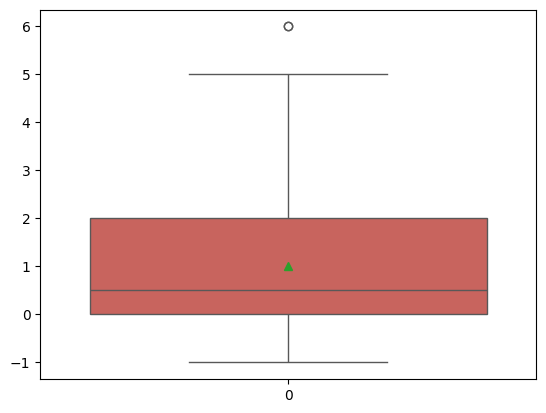

In [45]:
plot_n_boxplots([quasi_results[:, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

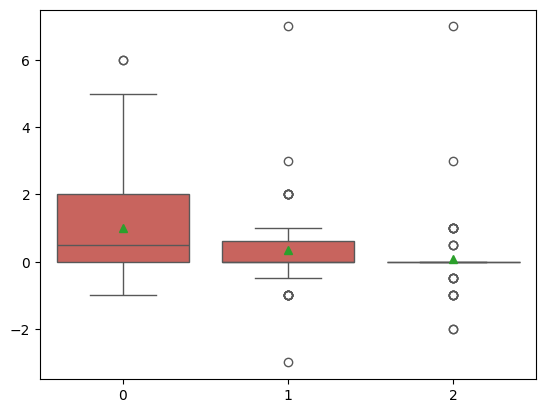

In [46]:
plot_n_boxplots([quasi_results[:, 0, 0, 1].flatten(), quasi_results[:, 0, 1, 1].flatten(), quasi_results[:, 0, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

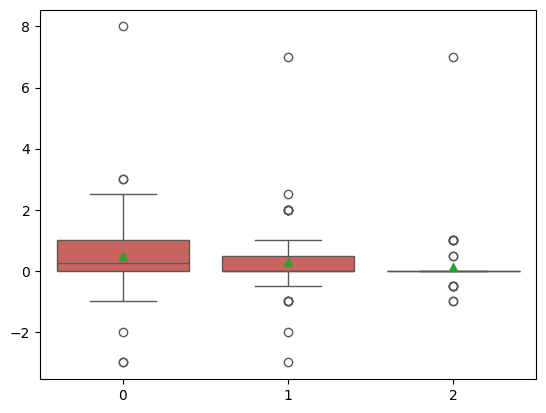

In [47]:
plot_n_boxplots([quasi_results[:, 1, 0, 1].flatten(), quasi_results[:, 1, 1, 1].flatten(), quasi_results[:, 1, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Investigating the statisitcs of itteration maximazing the average number of biological components.

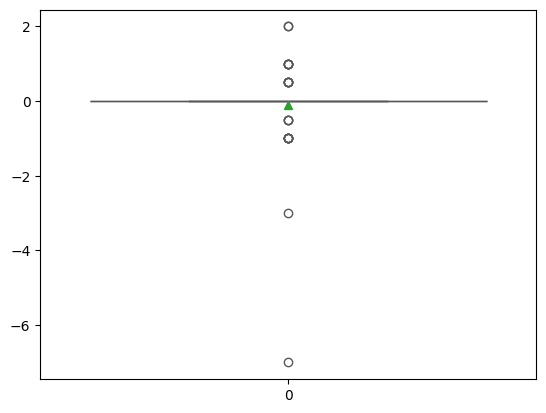

In [48]:
plot_n_boxplots([quasi_results[:, 0, 2, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

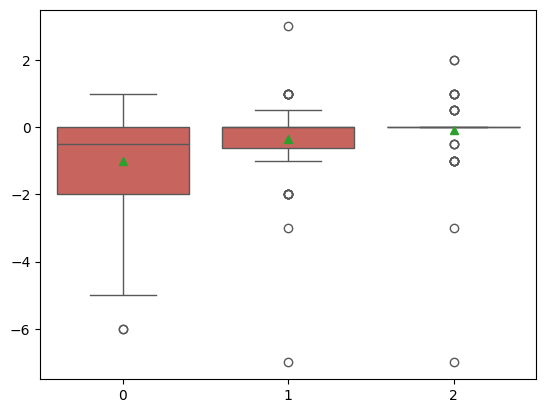

In [49]:
plot_n_boxplots([quasi_results[:, 0, 0, 2].flatten(), quasi_results[:, 0, 1, 2].flatten(), quasi_results[:, 0, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

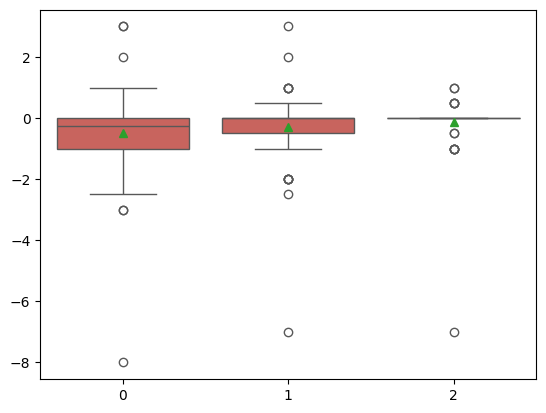

In [50]:
plot_n_boxplots([quasi_results[:, 1, 0, 2].flatten(), quasi_results[:, 1, 1, 2].flatten(), quasi_results[:, 1, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Then Analysis of how peaks thresholding does on its own
LOAD RESULTS

In [51]:
epi_peak_ec_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"epi_data\results_run_2_extended\0\peak")
epi_peak_eo_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"epi_data\results_run_2_extended\1\peak")

In [52]:
epi_peak_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [53]:
epi_peak_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [54]:
for i, pth in enumerate(epi_peak_ec_folder.iterdir()):
    current = np.load(pth)
    epi_peak_ec_results[i, :, :, :] = current.copy()

In [55]:
for i, pth in enumerate(epi_peak_eo_folder.iterdir()):
    current = np.load(pth)
    epi_peak_eo_results[i, :, :, :] = current.copy()

In [56]:
epi_peak_results = epi_peak_ec_results.__add__(epi_peak_eo_results)/2

In [57]:
wang_peak_ec_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"yulin_wang\results_run_2\0\peak")
wang_peak_eo_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"yulin_wang\results_run_2\1\peak")

In [58]:
wang_peak_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [59]:
wang_peak_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [60]:
for i, pth in enumerate(wang_peak_ec_folder.iterdir()):
    current = np.load(pth)
    wang_peak_ec_results[i, :, :, :] = current.copy()

In [61]:
for i, pth in enumerate(wang_peak_eo_folder.iterdir()):
    current = np.load(pth)
    wang_peak_eo_results[i, :, :, :] = current.copy()

In [62]:
wang_peak_results = wang_peak_ec_results.__add__(wang_peak_eo_results)/2

In [64]:
srm_peak_folder = pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"srm_data\results_run_2_extended\peak"

In [65]:
srm_peak_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [66]:
for i, pth in enumerate(srm_peak_folder.iterdir()):
    current = np.load(pth)
    srm_peak_results[i, :, :, :] = current.copy()

In [68]:
spis_peak_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"SPIS-Resting-State-Dataset\results_run_2_extended\peak")

In [69]:
spis_peak_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [70]:
for i, pth in enumerate(spis_peak_folder.iterdir()):
    current = np.load(pth)
    spis_peak_results[i, :, :, :] = current.copy()

In [71]:
peak_results = np.zeros(
    (   
        64,
        2,
        4,
        5
    )
)

In [72]:
peak_results[0:16, :, :, :] = epi_peak_results
peak_results[16:32, :, :, :] = srm_peak_results
peak_results[32:48, :, :, :] = spis_peak_results
peak_results[48:64, :, :, :] = wang_peak_results

In [73]:
peak_results[:, :, :, 2] =- peak_results[:, :, :, 1]

OPTIMAL PARAMETERS

In [63]:
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 0], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 1], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 2], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 3], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 4], 0)), (2, 4)))

(0, 0)
(0, 0)
(0, 3)
(0, 0)
(0, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

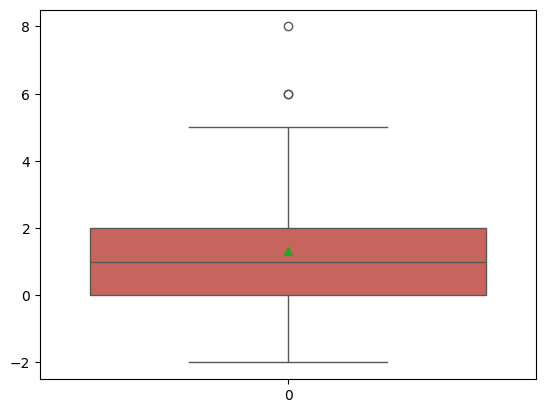

In [74]:
plot_n_boxplots([peak_results[:, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

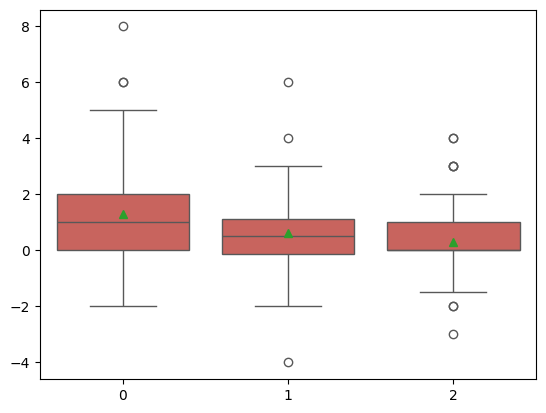

In [75]:
plot_n_boxplots([peak_results[:, 0, 0, 1].flatten(), peak_results[:, 0, 1, 1].flatten(), peak_results[:, 0, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

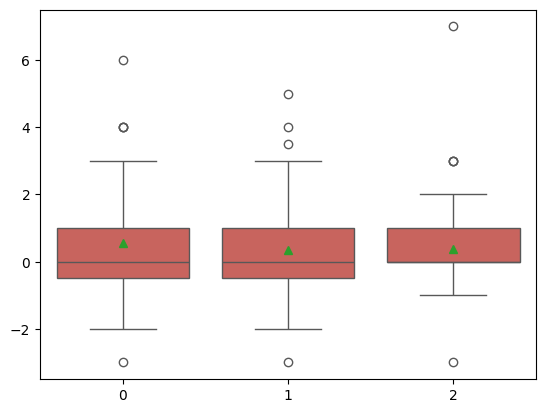

In [76]:
plot_n_boxplots([peak_results[:, 1, 0, 1].flatten(), peak_results[:, 1, 1, 1].flatten(), peak_results[:, 1, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Investigating the statisitcs of itteration maximazing the average number of biological components.

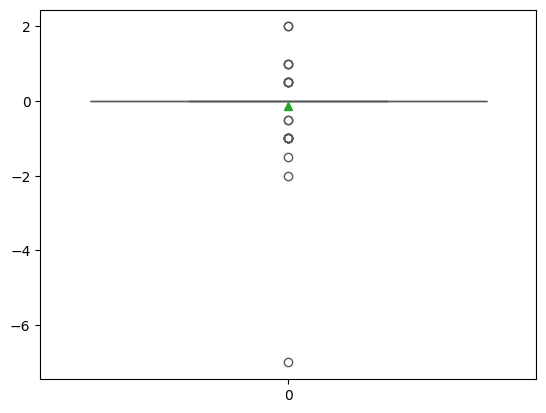

In [77]:
plot_n_boxplots([peak_results[:, 0, 3, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

c:\Users\workbench\eirik_master\code\Masteroppgave2\env\lib\site-packages\plotting\templates.py:124: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


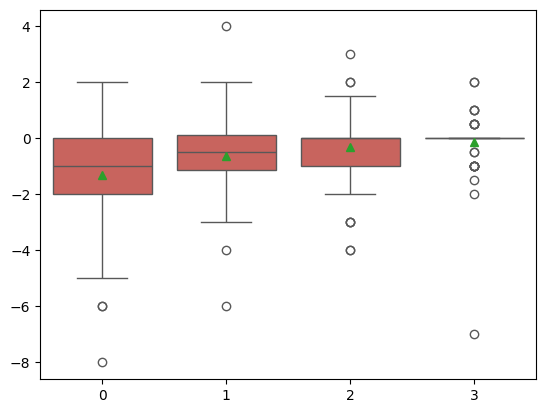

In [78]:
plot_n_boxplots([peak_results[:, 0, 0, 2].flatten(), peak_results[:, 0, 1, 2].flatten(), peak_results[:, 0, 2, 2].flatten(), peak_results[:, 0, 3, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

c:\Users\workbench\eirik_master\code\Masteroppgave2\env\lib\site-packages\plotting\templates.py:124: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


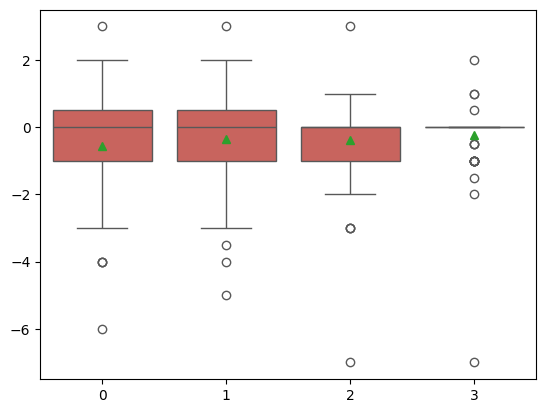

In [79]:
plot_n_boxplots([peak_results[:, 1, 0, 2].flatten(), peak_results[:, 1, 1, 2].flatten(), peak_results[:, 1, 2, 2].flatten(), peak_results[:, 1, 3, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Then comined
LOAD DATA

In [81]:
epi_combined_ec_folder = pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"epi_data\results_run_2_extended\0\combined"
epi_combined_eo_folder = pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"epi_data\results_run_2_extended\1\combined"

In [82]:
epi_combined_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [83]:
epi_combined_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [84]:
for i, pth in enumerate(epi_combined_ec_folder.iterdir()):
    current = np.load(pth)
    epi_combined_ec_results[i, :, :, :, :, :] = current.copy()

In [85]:
for i, pth in enumerate(epi_combined_eo_folder.iterdir()):
    current = np.load(pth)
    epi_combined_eo_results[i, :, :, :, :, :] = current.copy()

In [86]:
epi_combined_results = epi_combined_ec_results.__add__(epi_combined_eo_results)/2

In [87]:
wang_combined_ec_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"yulin_wang\results_run_2\0\combined")
wang_combined_eo_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"yulin_wang\results_run_2\1\combined")

In [88]:
wang_combined_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [89]:
wang_combined_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [90]:
for i, pth in enumerate(wang_combined_ec_folder.iterdir()):
    current = np.load(pth)
    wang_combined_ec_results[i, :, :, :, :, :] = current.copy()

In [91]:
for i, pth in enumerate(wang_combined_eo_folder.iterdir()):
    current = np.load(pth)
    wang_combined_eo_results[i, :, :, :, :, :] = current.copy()

In [92]:
wang_combined_results = wang_combined_ec_results.__add__(wang_combined_eo_results)/2

In [93]:
srm_combined_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"srm_data\results_run_2_extended\combined")

In [94]:
srm_combined_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [95]:
for i, pth in enumerate(srm_combined_folder.iterdir()):
    current = np.load(pth)
    srm_combined_results[i, :, :, :, :, :] = current.copy()

In [96]:
spis_combined_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"SPIS-Resting-State-Dataset\results_run_2_extended\combined")

In [97]:
spis_combined_alternate_results = np.zeros(
    (   
        8,
        2,
        4,
        2,
        4,
        5
    )
)

In [98]:
spis_combined_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [99]:
count=0
for i, pth in enumerate(spis_combined_folder.iterdir()):
    current = np.load(pth)
    spis_combined_alternate_results[count, :] += current.copy()
    if i%2 != 0:
        count+=1

In [100]:
spis_combined_alternate_results /= 2

In [101]:
for i, pth in enumerate(spis_combined_folder.iterdir()):
    current = np.load(pth)
    spis_combined_results[i, :, :, :, :, :] = current.copy()

In [102]:
combined_results = np.zeros(
    (   
        64,
        2,
        3,
        2,
        4,
        5
    )
)

In [103]:
combined_alternate_results = np.zeros(
    (   
        56,
        2,
        3,
        2,
        4,
        5
    )
)

In [104]:
combined_results[0:16, :, :, :] = epi_combined_results[:, :, 1:, :, :, :]
combined_results[16:32, :, :, :] = srm_combined_results[:, :, 1:, :, :, :]
combined_results[32:48, :, :, :] = spis_combined_results[:, :, 1:, :, :, :]
combined_results[48:64, :, :, :] = wang_combined_results[:, :, 1:, :, :, :]

In [105]:
combined_alternate_results[0:16, :, :, :] = epi_combined_results[:, :, 1:, :, :, :]
combined_alternate_results[16:32, :, :, :] = srm_combined_results[:, :, 1:, :, :, :]
combined_alternate_results[32:40, :, :, :] = spis_combined_alternate_results[:, :, 1:, :, :, :]
combined_alternate_results[40:56, :, :, :] = wang_combined_results[:, :, 1:, :, :, :]

In [106]:
combined_results[:, :, :, :, :, 2] -= combined_results[:, :, :, :, :, 1]
combined_alternate_results[:, :, :, :, :, 2] -= combined_alternate_results[:, :, :, :, :, 1]

OPTIMAL PARAMETERS

In [646]:
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 0], 0)), (2, 3, 2, 4)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 1], 0)), (2, 3, 2, 4)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 2], 0)), (2, 3, 2, 4)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 3], 0)), (2, 3, 2, 4)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 4], 0)), (2, 3, 2, 4)))

(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 2, 1, 3)
(0, 0, 0, 0)
(0, 0, 0, 0)


PLOTS FOR ARTICLE AND DATA FOR REGGRESION NOTEBOOK

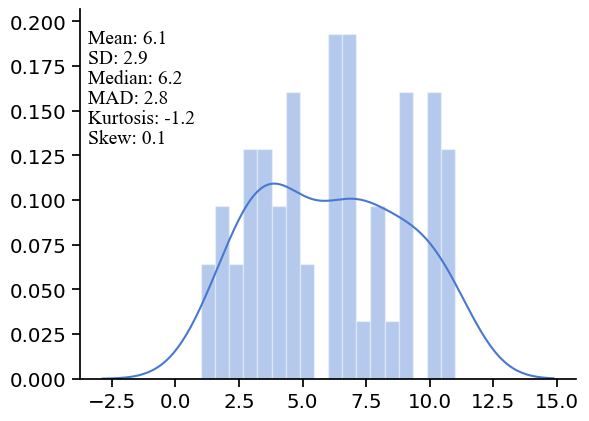

In [107]:
plot_dist_hist(combined_alternate_results[:, 0, 0, 0, 0, 1]+baseline_results_alternate[:, 1])
plt.savefig(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"grid_brain_sdx")

In [108]:
np.save(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"linear_reg_1\mine", combined_alternate_results[:, 0, 0, 0, 0, 1]+baseline_results_alternate[:, 1])
np.save(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"linear_reg_1\mine_ex", combined_alternate_results[:, 0, 0, 0, 0, 0])

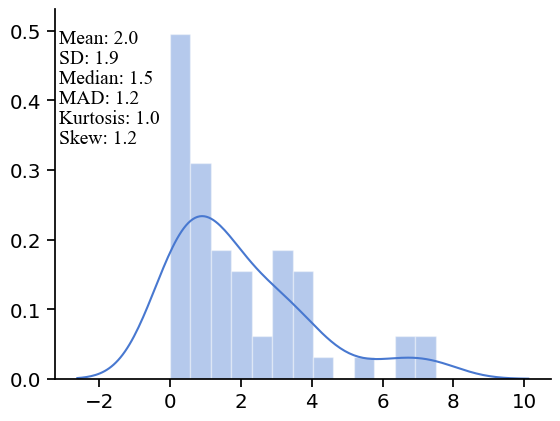

In [109]:
plot_dist_hist(combined_alternate_results[:, 0, 2, 1, 3, 2]+baseline_results_alternate[:, 2])
plt.savefig(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"grid_artefact_sdx")

In [110]:
np.save(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"linear_reg_1_art\mine", combined_alternate_results[:, 0, 2, 1, 3, 2]+baseline_results_alternate[:, 2])
np.save(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"linear_reg_1_art\mine_ex", combined_alternate_results[:, 0, 2, 1, 3, 0])

Investigating the statisitcs of itteration maximazing the average number of braincomponents.

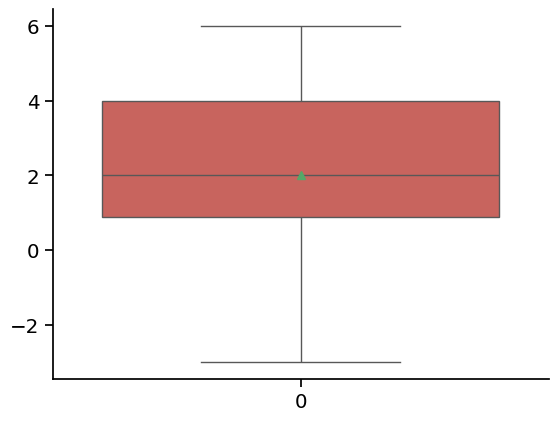

In [111]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

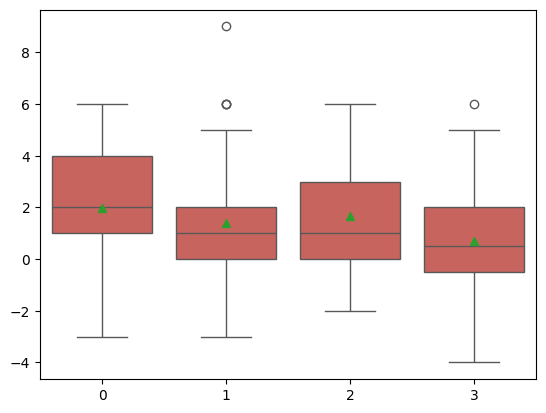

In [100]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 1], combined_results[:, 0, 1, 0, 0, 1], combined_results[:, 0, 0, 0, 1, 1], combined_results[:, 0, 1, 0, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

All mean.. The lower peaks threshold gives a better median, but mean stays the same and spred is higher.
all median?

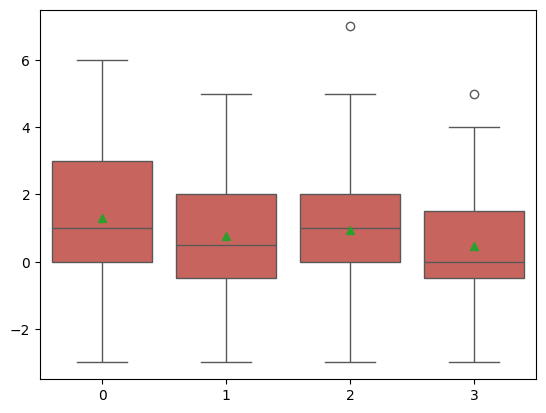

In [101]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 0, 1], combined_results[:, 1, 1, 1, 0, 1], combined_results[:, 1, 0, 1, 1, 1], combined_results[:, 1, 1, 1, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Quasi median?

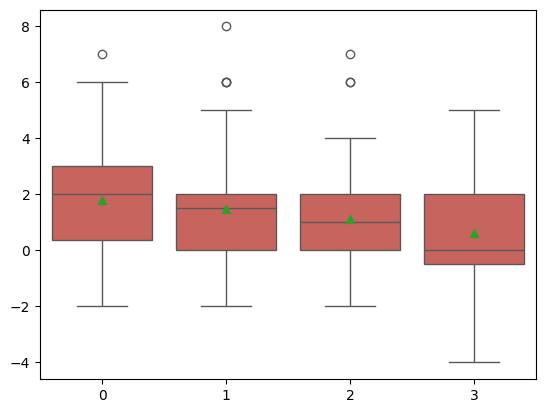

In [102]:
plot_n_boxplots([combined_results[:, 1, 0, 0, 0, 1], combined_results[:, 1, 1, 0, 0, 1], combined_results[:, 1, 0, 0, 1, 1], combined_results[:, 1, 1, 0, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

peaks median?

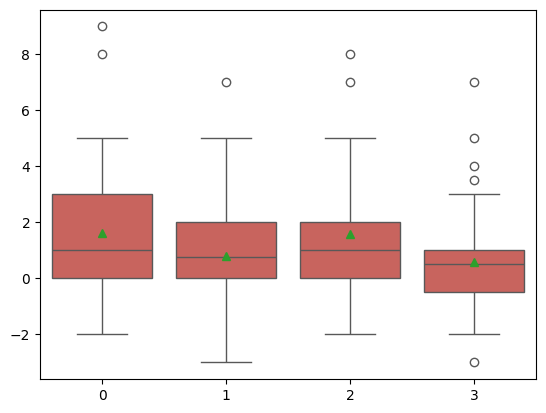

In [103]:
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 1], combined_results[:, 0, 1, 1, 0, 1], combined_results[:, 0, 0, 1, 1, 1], combined_results[:, 0, 1, 1, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Investigating the statisitcs of itteration maximazing the average number of biological components.

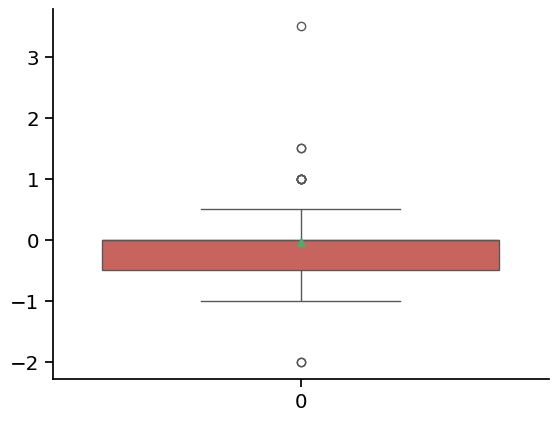

In [112]:
plot_n_boxplots([combined_results[:, 0, 2, 1, 3, 2].flatten()], [sns.xkcd_rgb["pale red"]])

This one for n_brain

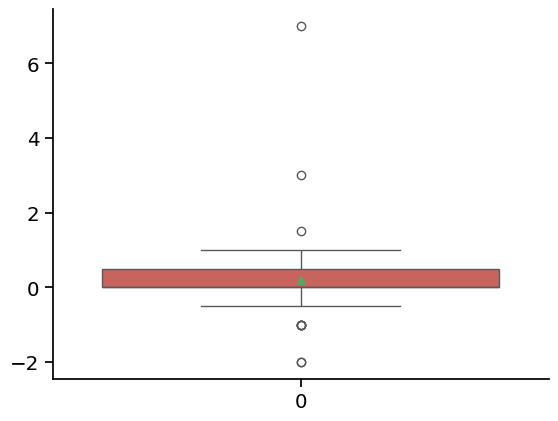

In [113]:
plot_n_boxplots([combined_results[:, 0, 2, 1, 3, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

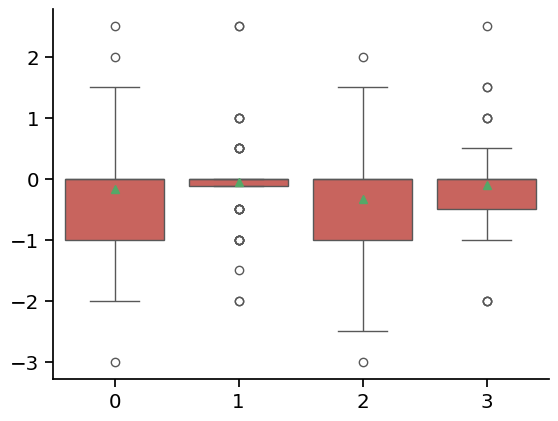

In [115]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 3, 2], combined_results[:, 1, 1, 1, 3, 2], combined_results[:, 1, 0, 1, 2, 2], combined_results[:, 1, 1, 1, 2, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

all mean?

c:\Users\workbench\eirik_master\code\Masteroppgave2\env\lib\site-packages\plotting\templates.py:124: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


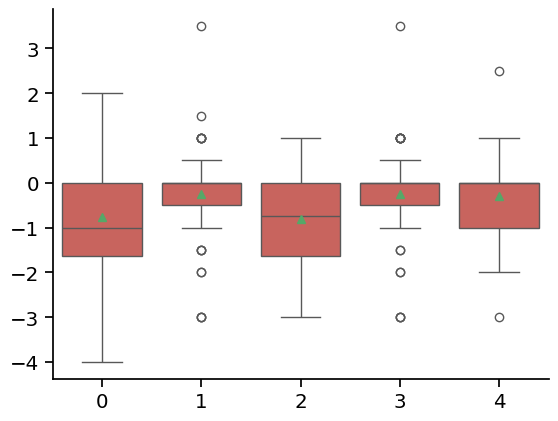

In [116]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 3, 2], combined_results[:, 0, 1, 0, 3, 2], combined_results[:, 0, 0, 0, 2, 2], combined_results[:, 0, 1, 0, 2, 2], combined_results[:, 1, 1, 1, 1, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

best from each con of distributions

Best mean

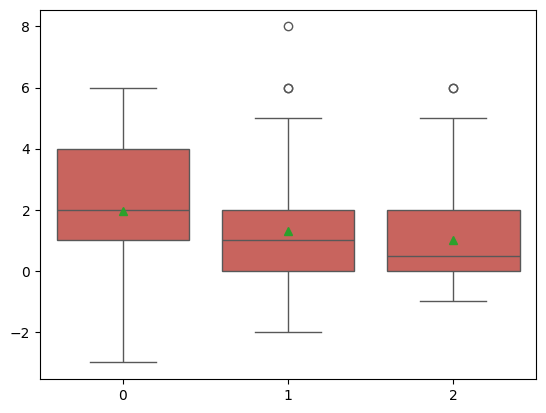

In [175]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 1], peak_results[:, 0, 0, 1], quasi_results[:, 0, 0, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

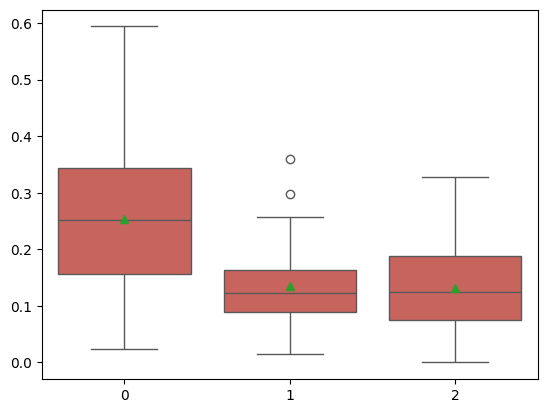

In [176]:
# discarded
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 0], peak_results[:, 0, 0, 0], quasi_results[:, 0, 0, 0]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

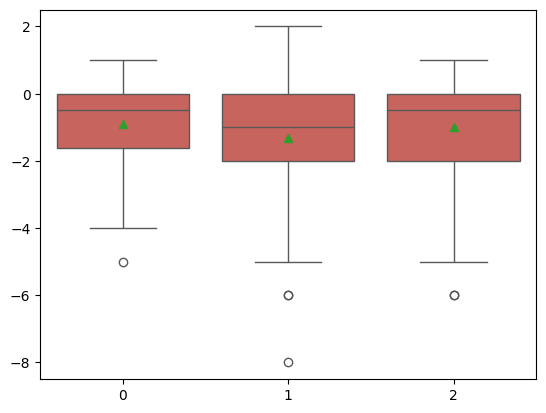

In [185]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 2], peak_results[:, 0, 0, 2], quasi_results[:, 0, 0, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Best biocomp

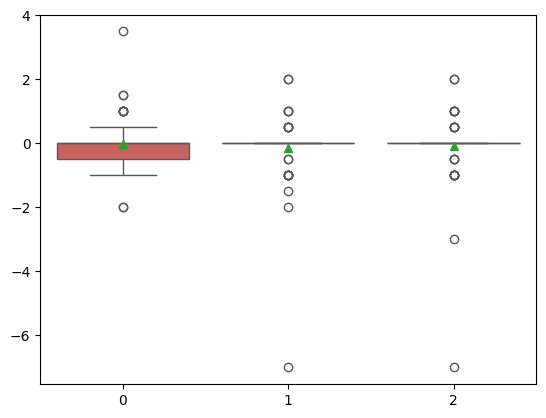

In [654]:
plot_n_boxplots([combined_results[:, 0, 2, 1, 3, 2], peak_results[:, 0, 3, 2], quasi_results[:, 0, 2, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

In [656]:
print(np.mean(combined_results[:, 0, 2, 1, 3, 2]), np.mean(peak_results[:, 0, 3, 2]), np.mean(quasi_results[:, 0, 2, 2]))

-0.03125 -0.140625 -0.09375


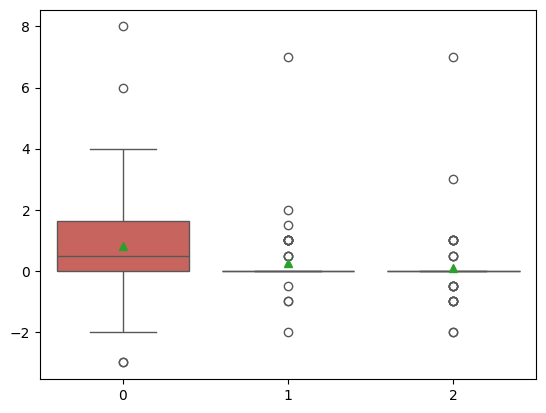

In [295]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 3, 1], peak_results[:, 1, 3, 1], quasi_results[:, 0, 2, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

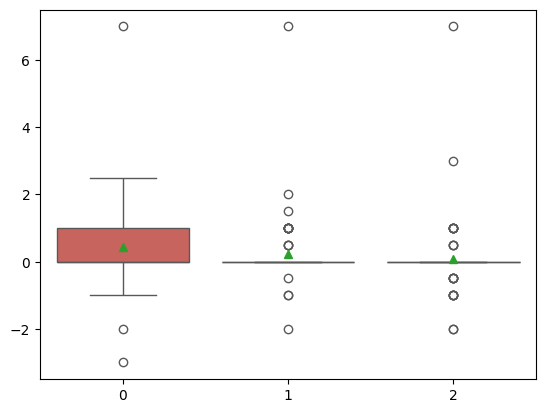

In [296]:
plot_n_boxplots([combined_results[:, 1, 1, 1, 3, 1], peak_results[:, 1, 3, 1], quasi_results[:, 0, 2, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

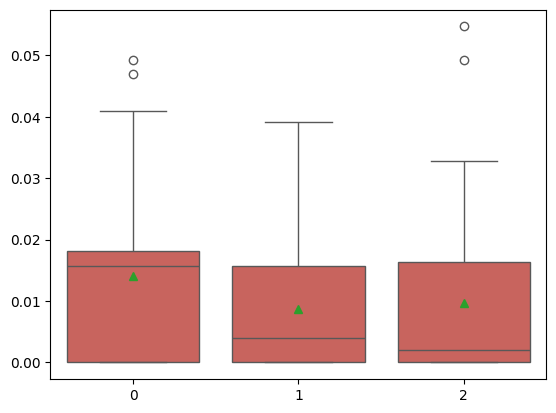

In [181]:
#Discarded
plot_n_boxplots([combined_results[:, 1, 1, 1, 3, 0], peak_results[:, 0, 3, 0], quasi_results[:, 0, 2, 0]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])